In [32]:
import numpy as np
import torch
import clip
import cv2
from IPython.display import Video
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import savgol_filter

from src.clip_video_response import clip_video_response

In [33]:
path = "..\\data\\videos\\ball_kick.mp4"

# Note: uncomment if you want to view the video, otherwise leave commented.
# Embedding videos into notebook can cause UI to slow down
# 
# Video(path, embed=True)

In [34]:
query_negative = "photo of a stationary soccer ball"
query_positive = "photo of a flying soccer ball"

In [35]:
response = clip_video_response()
negative_response = response.generate_response_curve(video_path=path, queries=[query_negative], sampling_rate=1)[0]
positive_reponse = response.generate_response_curve(video_path=path, queries=[query_positive], sampling_rate=1)[0]

filtered_negative_response = savgol_filter(negative_response, 30, 3)
filtered_positive_reponse = savgol_filter(positive_reponse, 30, 3)

normalized_negative_response = stats.zscore(filtered_negative_response)
normalized_positive_reponse = stats.zscore(filtered_positive_reponse)

filtered_difference_response = filtered_positive_reponse - filtered_negative_response
normalized_difference_response = normalized_positive_reponse - normalized_negative_response


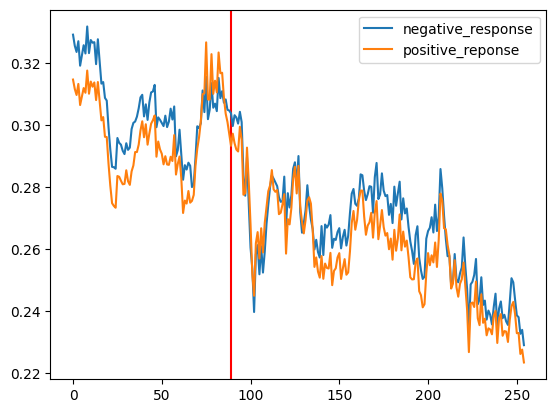

In [36]:
plt.axvline(x = 89, color = 'r', linestyle = '-')
plt.plot(negative_response, label="negative_response")
plt.plot(positive_reponse, label="positive_reponse")
plt.legend()

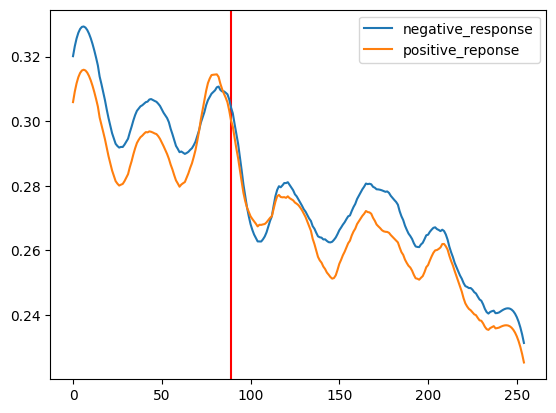

In [37]:
plt.axvline(x = 89, color = 'r', linestyle = '-')
plt.plot(filtered_negative_response, label="negative_response")
plt.plot(filtered_positive_reponse, label="positive_reponse")
plt.legend()

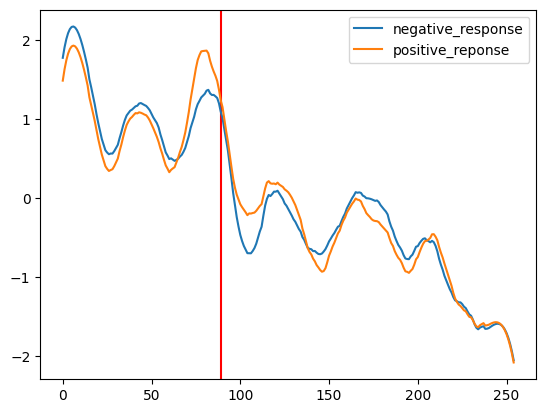

In [38]:
plt.axvline(x = 89, color = 'r', linestyle = '-')
plt.plot(normalized_negative_response, label="negative_response")
plt.plot(normalized_positive_reponse, label="positive_reponse")
plt.legend()

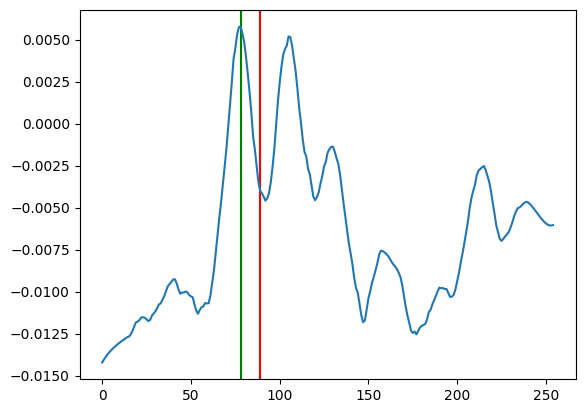

In [39]:
plt.axvline(x = 89, color = 'r', linestyle = '-')
plt.axvline(x = np.argmax(filtered_difference_response), color = 'g', linestyle = '-')
plt.plot(filtered_difference_response)

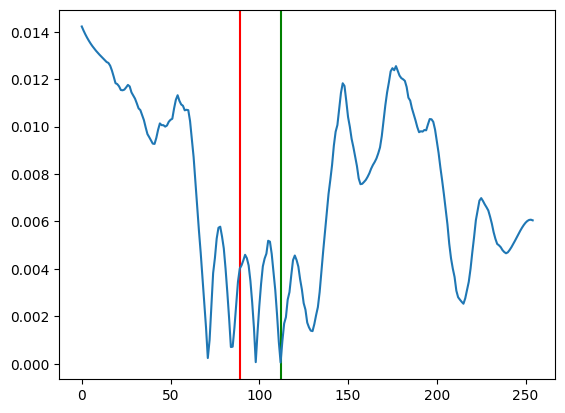

In [44]:
abs_filtered_difference_response = np.abs(filtered_difference_response)
plt.axvline(x = 89, color = 'r', linestyle = '-')
plt.axvline(x = np.argmin(abs_filtered_difference_response), color = 'g', linestyle = '-')
plt.plot(abs_filtered_difference_response)

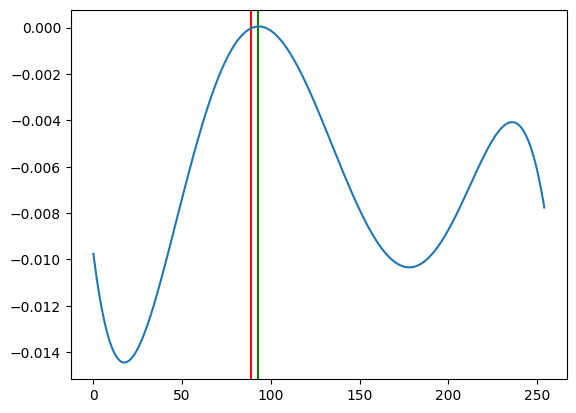

In [40]:
convex_curve = savgol_filter(filtered_difference_response, len(filtered_difference_response), 5)
plt.axvline(x = 89, color = 'r', linestyle = '-')
plt.axvline(x = np.argmax(convex_curve), color = 'g', linestyle = '-')
plt.plot(convex_curve)

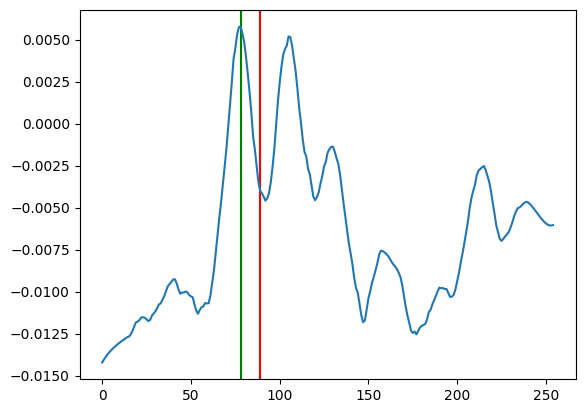

In [41]:
plt.axvline(x = 89, color = 'r', linestyle = '-')
plt.axvline(x = np.argmax(normalized_difference_response), color = 'g', linestyle = '-')
plt.plot(filtered_difference_response)

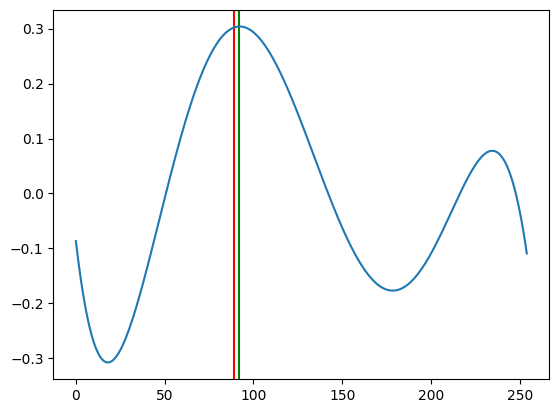

In [42]:
convex_curve = savgol_filter(normalized_difference_response, len(normalized_difference_response), 5)
plt.axvline(x = 89, color = 'r', linestyle = '-')
plt.axvline(x = np.argmax(convex_curve), color = 'g', linestyle = '-')
plt.plot(convex_curve)